# Section 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/DailyHits.csv', index_col=0)

print(data.head())
print(data.sum())

             001  002  003  004  005  006  007  008  009  010  ...  158  159  \
Date                                                           ...             
2019-01-01  1062   33   67   42    0    4    0    0    1   69  ...    0    0   
2019-01-02   976   41   72   19    2    0    0   14    1   62  ...    5    0   
2019-01-03   956   27   71   28    4    6   11    0    0   64  ...    0    0   
2019-01-04   976   30   57   29    0    0    3    0    2   52  ...    0    2   
2019-01-05   956   45   65   27    4    1    0    0    0   55  ...   12    0   

            160  161  162  163  164  165  166  167  
Date                                                
2019-01-01    4    0   10    2    2    2    0    0  
2019-01-02    0    7    0    0    0    0    1    3  
2019-01-03    0    0    6    0    0    3    0    0  
2019-01-04    0    0    0    0    0    0    0    7  
2019-01-05    0    4    0    0    0    0    5    2  

[5 rows x 167 columns]
001    379682
002     17401
003     27249
00

015    467123
001    379682
003     27249
080     23357
155     22183
156     21966
048     19229
002     17401
010     17046
004     11668
008      1487
122      1483
092      1450
018      1430
045      1422
dtype: int64


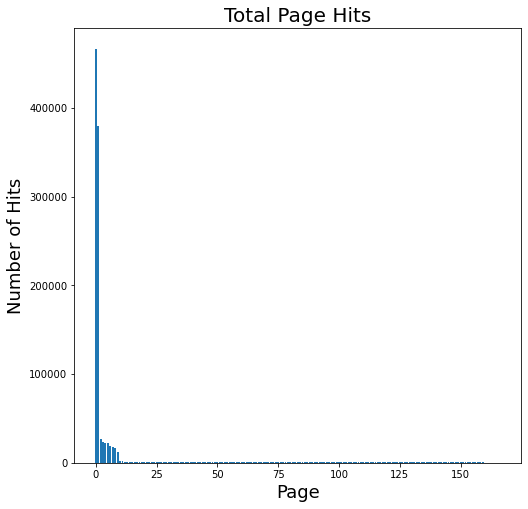

In [2]:
data = data.reindex(data.sum().sort_values(ascending=False).index, axis=1)
print(data.sum().head(15))
plt.figure(figsize=(8, 8))
x_pos = np.arange(len(data.columns))
plt.bar(x_pos, data.sum(), align='center')
plt.xlabel('Page', fontsize=18)
plt.ylabel('Number of Hits', fontsize=18)
plt.title('Total Page Hits', fontsize=20)
plt.show()

             015   001  003  080
Date                            
2019-01-01  1184  1062   67   67
2019-01-02  1266   976   72   61
2019-01-03  1047   956   71   44
2019-01-04  1108   976   57   61
2019-01-05  1214   956   65   61


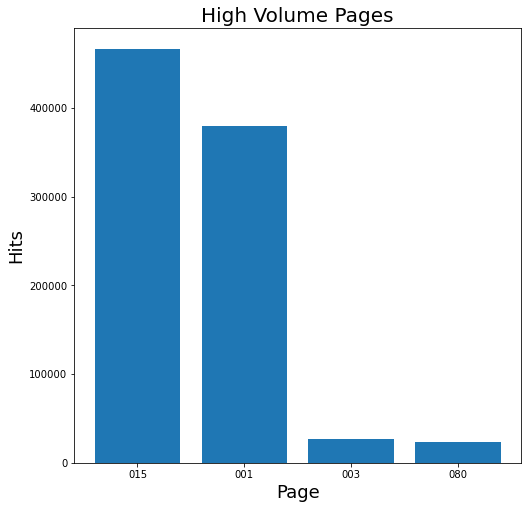

In [3]:
selected = ['015', '001', '003', '080']
print(data[selected].head())

# data[selected].sum().plot.bar(width=0.8, rot=0, figsize=(8, 8))
plt.figure(figsize=(8, 8))
x_pos = np.arange(len(data[selected].columns))
plt.bar(x_pos, data[selected].sum(), align='center')
plt.xticks(x_pos, data[selected].columns)
plt.xlabel('Page', fontsize=18)
plt.ylabel('Hits', fontsize=18)
plt.title('High Volume Pages', fontsize=20)
plt.show()


            155  156  048  002  010  004
Date                                    
2019-01-01   39   47   37   33   69   42
2019-01-02   59   56   39   41   62   19
2019-01-03   58   46   38   27   64   28
2019-01-04   39   52   35   30   52   29
2019-01-05   40   41   45   45   55   27


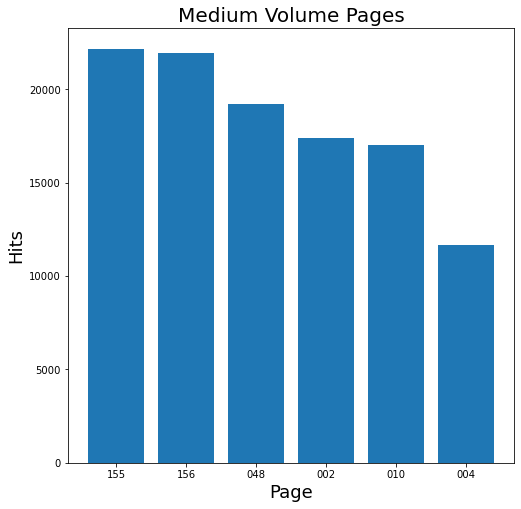

In [4]:
selected2 = ['155', '156', '048', '002', '010', '004']
print(data[selected2].head())

# data[selected].sum().plot.bar(width=0.8, rot=0, figsize=(8, 8))
plt.figure(figsize=(8, 8))
x_pos = np.arange(len(data[selected2].columns))
plt.bar(x_pos, data[selected2].sum(), align='center')
plt.xticks(x_pos, data[selected2].columns)
plt.xlabel('Page', fontsize=18)
plt.ylabel('Hits', fontsize=18)
plt.title('Medium Volume Pages', fontsize=20)
plt.show()


            008  122  092  018  045  088  025  151  051  038  ...  159  022  \
Date                                                          ...             
2019-01-01    0    0    2    6    1    0    9    6    5    7  ...    0    0   
2019-01-02   14   12    4    0    0    5    0    0    0    0  ...    0    0   
2019-01-03    0    0    0    2    0    1    5    7    9    4  ...    0    0   
2019-01-04    0   10    0    5    0    0    0    9    0    0  ...    2    4   
2019-01-05    0    0   15    0    0    6   13    0    5    4  ...    0    0   

            126  029  138  059  160  079  081  101  
Date                                                
2019-01-01    2    0    2    1    4    1    2    0  
2019-01-02    2    0    1    0    0    2    0    0  
2019-01-03    2    0    0    0    0    3    3    0  
2019-01-04    0    0    0    0    0    0    0    0  
2019-01-05    0    0    0    0    0    3    1    1  

[5 rows x 157 columns]


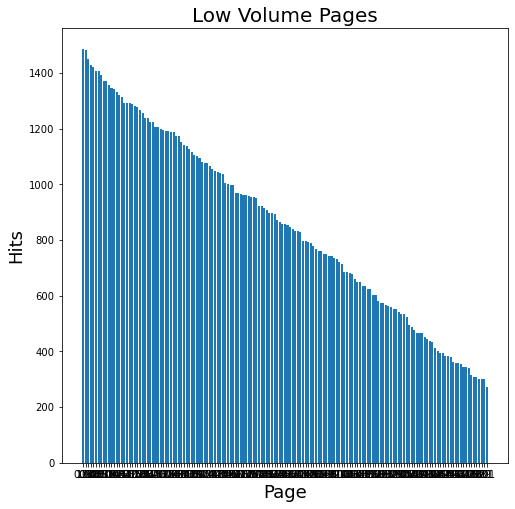

             015   001  003  080  155  156  048  002  010  004  Others
Date                                                                  
2019-01-01  1184  1062   67   67   39   47   37   33   69   42     358
2019-01-02  1266   976   72   61   59   56   39   41   62   19     419
2019-01-03  1047   956   71   44   58   46   38   27   64   28     352
2019-01-04  1108   976   57   61   39   52   35   30   52   29     291
2019-01-05  1214   956   65   61   40   41   45   45   55   27     447


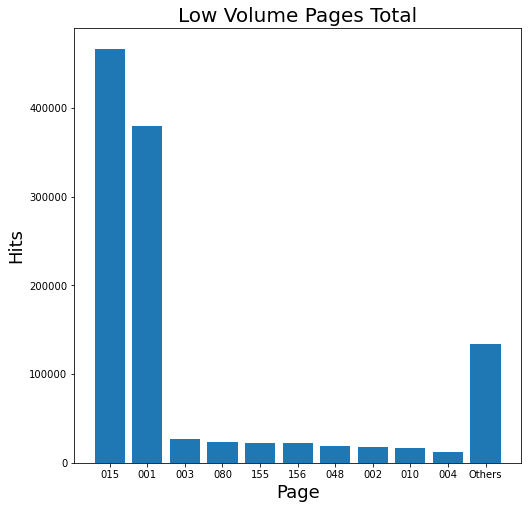

In [5]:
selected3 = data.columns[data.sum() < 2000]
print(data[selected3].head())



# data[selected].sum().plot.bar(width=0.8, rot=0, figsize=(8, 8))
plt.figure(figsize=(8, 8))
x_pos = np.arange(len(data[selected3].columns))
plt.bar(x_pos, data[selected3].sum(), align='center')
plt.xticks(x_pos, data[selected3].columns)
plt.xlabel('Page', fontsize=18)
plt.ylabel('Hits', fontsize=18)
plt.title('Low Volume Pages', fontsize=20)
plt.show()


selected4 = []
columns = data.columns
data['Others'] = [0] * len(data.index)
for name in columns:
    total_hits = data[name].sum()
    if total_hits > 2000:
        selected4.append(name)
    else:
        data['Others'] += data[name]
selected4.append('Others')
print(data[selected4].head())

plt.figure(figsize=(8, 8))
x_pos = np.arange(len(data[selected4].columns))
plt.bar(x_pos, data[selected4].sum(), align='center')
plt.xticks(x_pos, data[selected4].columns)
plt.xlabel('Page', fontsize=18)
plt.ylabel('Hits', fontsize=18)
plt.title('Low Volume Pages Total', fontsize=20)
plt.show()


In [6]:
categories = ['High','High-Medium', 'Medium', 'Low', 'Very Low']
categories_selected = [[] for i in range(len(categories))]
for name in data.columns:
    total_hits = data[name].sum()
    if total_hits > 50000:
        category = 0
    elif total_hits > 20000:
        category = 1
    elif total_hits > 5000:
        category = 2
    elif total_hits > 1000:
        category = 3
    else:
        category = 4
    categories_selected[category].append(name)
    print('Page ' + name + ' is ' + categories[category] + ' volume')

for i in range(len(categories)):
    print(categories[i] + ': ' + str(categories_selected[i]))



Page 015 is High volume
Page 001 is High volume
Page 003 is High-Medium volume
Page 080 is High-Medium volume
Page 155 is High-Medium volume
Page 156 is High-Medium volume
Page 048 is Medium volume
Page 002 is Medium volume
Page 010 is Medium volume
Page 004 is Medium volume
Page 008 is Low volume
Page 122 is Low volume
Page 092 is Low volume
Page 018 is Low volume
Page 045 is Low volume
Page 088 is Low volume
Page 025 is Low volume
Page 151 is Low volume
Page 051 is Low volume
Page 038 is Low volume
Page 104 is Low volume
Page 134 is Low volume
Page 097 is Low volume
Page 108 is Low volume
Page 075 is Low volume
Page 034 is Low volume
Page 041 is Low volume
Page 021 is Low volume
Page 130 is Low volume
Page 055 is Low volume
Page 125 is Low volume
Page 078 is Low volume
Page 028 is Low volume
Page 121 is Low volume
Page 037 is Low volume
Page 067 is Low volume
Page 084 is Low volume
Page 141 is Low volume
Page 071 is Low volume
Page 133 is Low volume
Page 137 is Low volume
Page 167 is

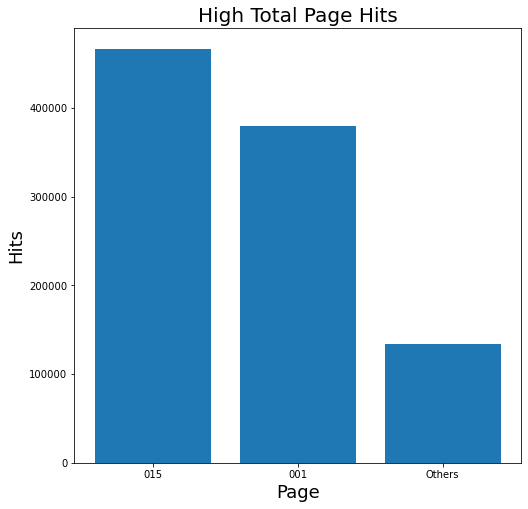

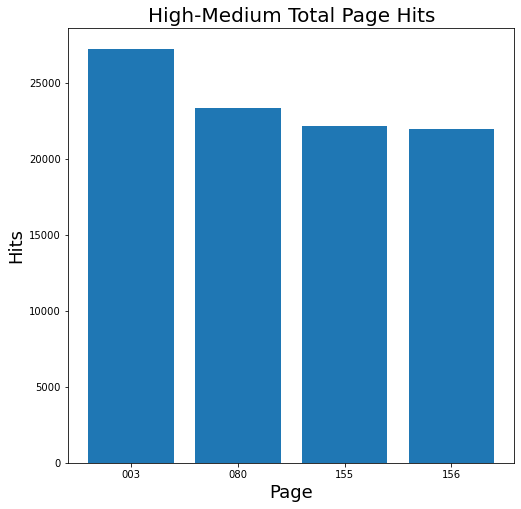

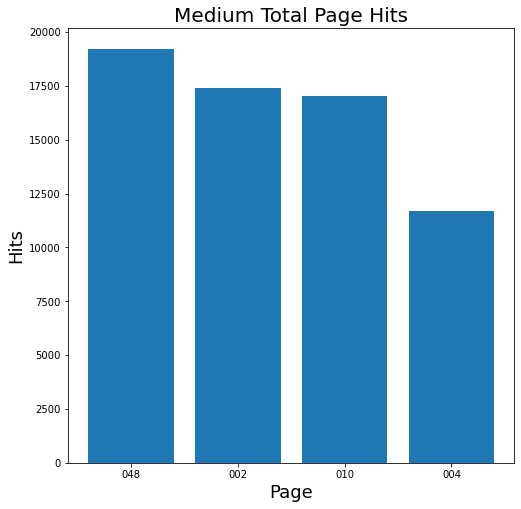

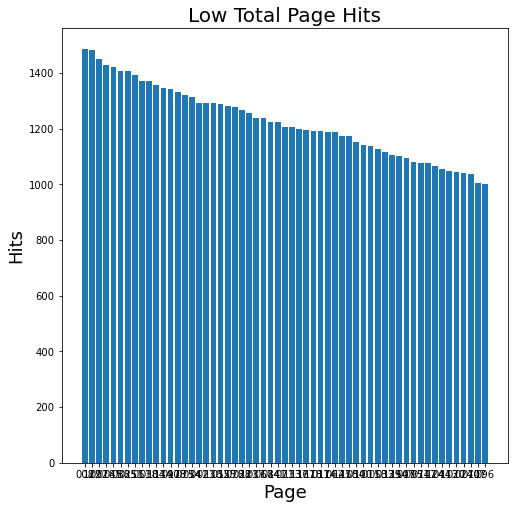

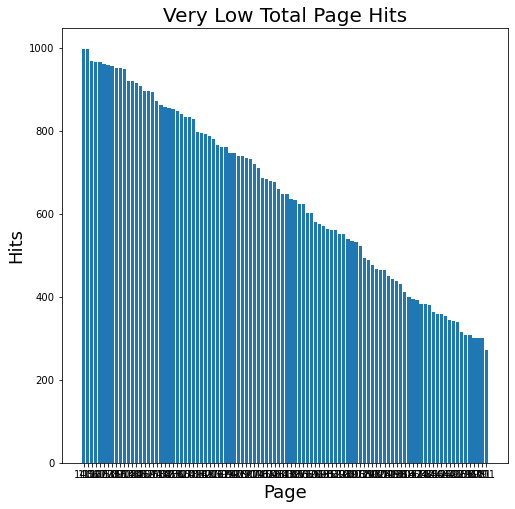

In [7]:

for i, selected in enumerate(categories_selected):
    plt.figure(figsize=(8, 8))
    x_pos = np.arange(len(data[selected].columns))
    plt.bar(x_pos, data[selected].sum(), align='center')
    plt.xticks(x_pos, data[selected].columns)
    plt.xlabel('Page', fontsize=18)
    plt.ylabel('Hits', fontsize=18)
    plt.title(categories[i] + ' Total Page Hits', fontsize=20)
    plt.show()

             015   001  Others  003  080  155  156  048  002  010  ...  159  \
Date                                                               ...        
2019-01-01  1184  1062     358   67   67   39   47   37   33   69  ...    0   
2019-01-02  1266   976     419   72   61   59   56   39   41   62  ...    0   
2019-01-03  1047   956     352   71   44   58   46   38   27   64  ...    0   
2019-01-04  1108   976     291   57   61   39   52   35   30   52  ...    2   
2019-01-05  1214   956     447   65   61   40   41   45   45   55  ...    0   

            022  126  029  059  138  160  079  081  101  
Date                                                     
2019-01-01    0    2    0    1    2    4    1    2    0  
2019-01-02    0    2    0    0    1    0    2    0    0  
2019-01-03    0    2    0    0    0    0    3    3    0  
2019-01-04    4    0    0    0    0    0    0    0    0  
2019-01-05    0    0    0    0    0    0    3    1    1  

[5 rows x 168 columns]
             015

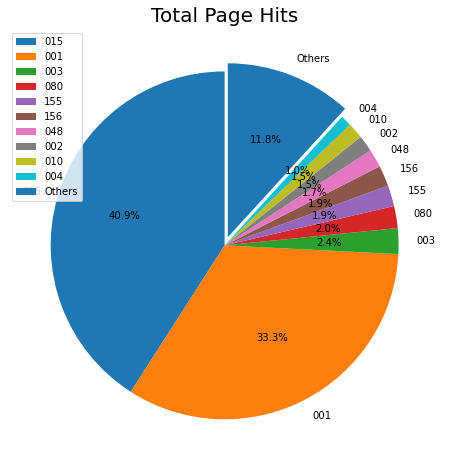

In [8]:
data = data.reindex(data.sum().sort_values(ascending=False).index, axis=1)
print(data.head())

explodeList = []
selected5 = []
columns = data.columns
data['Others'] = [0] * len(data.index)
for name in columns:
    total_hits = data[name].sum()
    if total_hits > 2000:
        selected5.append(name)
        explodeList.append(0)
    else:
        data['Others'] += data[name]
selected5.append('Others')
explodeList.append(0.05)
print(data[selected5].head())

plt.figure(figsize=(8, 8))
plt.pie(data[selected5].sum(), labels=selected5, autopct='%1.1f%%', startangle=90, explode=explodeList)
plt.title('Total Page Hits', fontsize=20)
plt.legend(loc=2)
plt.show()


# Section 2

In [9]:
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/world_population.csv', index_col=0)

print(data.head())
print(data.mean())

             Country Code                                     Indicator Name  \
Country Name                                                                   
Aruba                 ABW  Population density (people per sq. km of land ...   
Andorra               AND  Population density (people per sq. km of land ...   
Afghanistan           AFG  Population density (people per sq. km of land ...   
Angola                AGO  Population density (people per sq. km of land ...   
Albania               ALB  Population density (people per sq. km of land ...   

             Indicator Code  1960        1961        1962        1963  \
Country Name                                                            
Aruba           EN.POP.DNST   NaN  307.972222  312.366667  314.983333   
Andorra         EN.POP.DNST   NaN   30.587234   32.714894   34.914894   
Afghanistan     EN.POP.DNST   NaN   14.038148   14.312061   14.599692   
Angola          EN.POP.DNST   NaN    4.305195    4.384299    4.464433   
A

In [10]:
data = data.transpose()
print(data.head())
drop_selected = ['Country Code', 'Indicator Name', 'Indicator Code']

data_selected = data.drop(drop_selected, axis=0)
print("\n******************************\nSelected Data\n",data_selected.head())

Country Name                                                Aruba  \
Country Code                                                  ABW   
Indicator Name  Population density (people per sq. km of land ...   
Indicator Code                                        EN.POP.DNST   
1960                                                          NaN   
1961                                                      307.972   

Country Name                                              Andorra  \
Country Code                                                  AND   
Indicator Name  Population density (people per sq. km of land ...   
Indicator Code                                        EN.POP.DNST   
1960                                                          NaN   
1961                                                      30.5872   

Country Name                                          Afghanistan  \
Country Code                                                  AFG   
Indicator Name  Population densi

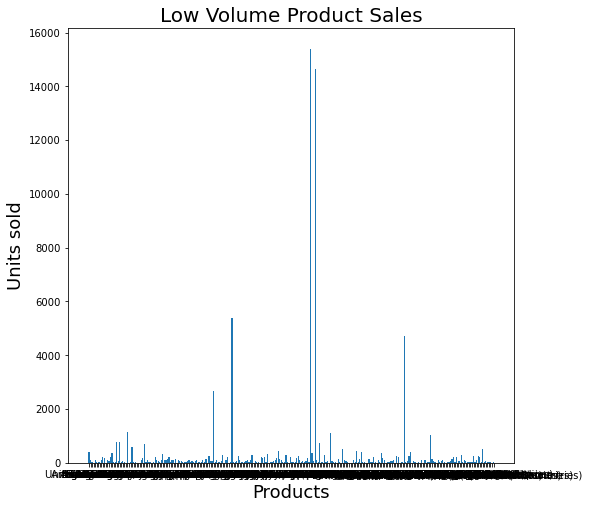

In [15]:
plt.figure(figsize=(8, 8))
x_pos = np.arange(len(data_selected.columns))
plt.bar(x_pos, data_selected.mean(), align='center')
plt.xticks(x_pos, data_selected.columns)
plt.xlabel('Country', fontsize=18)
plt.ylabel('Population', fontsize=18)
plt.title('Country Population Density', fontsize=20)
plt.show()


In [17]:
categories = ['Extreme','High', 'Medium', 'Low']
categories_selected = [[] for i in range(len(categories))]
for name in data_selected.columns:
    pop_dense = data_selected[name].mean()
    if pop_dense > 10000:
        category = 0
    elif pop_dense > 2500:
        category = 1
    elif pop_dense > 1000:
        category = 2
    else:
        category = 3
    categories_selected[category].append(name)
    print(name + ' is ' + categories[category] + ' density')

for i in range(len(categories)):
    print(categories[i] + ': ' + str(categories_selected[i]))


Aruba is Low density
Andorra is Low density
Afghanistan is Low density
Angola is Low density
Albania is Low density
Arab World is Low density
United Arab Emirates is Low density
Argentina is Low density
Armenia is Low density
American Samoa is Low density
Antigua and Barbuda is Low density
Australia is Low density
Austria is Low density
Azerbaijan is Low density
Burundi is Low density
Belgium is Low density
Benin is Low density
Burkina Faso is Low density
Bangladesh is Low density
Bulgaria is Low density
Bahrain is Low density
Bahamas, The is Low density
Bosnia and Herzegovina is Low density
Belarus is Low density
Belize is Low density
Bermuda is Medium density
Bolivia is Low density
Brazil is Low density
Barbados is Low density
Brunei Darussalam is Low density
Bhutan is Low density
Botswana is Low density
Central African Republic is Low density
Canada is Low density
Central Europe and the Baltics is Low density
Switzerland is Low density
Channel Islands is Low density
Chile is Low den

ValueError: shape mismatch: objects cannot be broadcast to a single shape

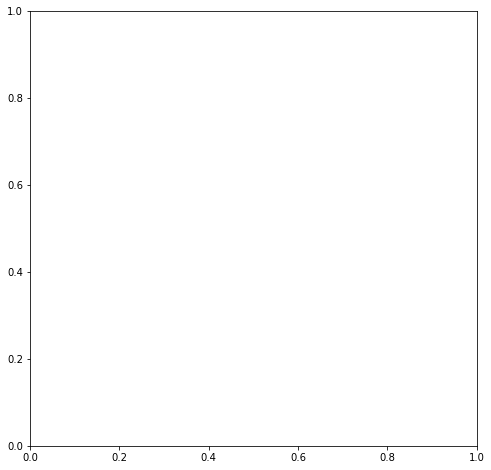

In [21]:
for i, selected in enumerate(categories_selected):
    plt.figure(figsize=(8, 8))
    x_pos = np.arange(len(data[selected].columns))
    plt.bar(x_pos, data[selected].sum(), align='center')
    plt.xticks(x_pos, data[selected].columns)
    plt.xlabel('Country', fontsize=18)
    plt.ylabel('Population', fontsize=18)
    plt.title(categories[i] +'Country Population Density', fontsize=20)
    plt.show()